In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [36]:
!ls "/content/drive/My Drive/Colab Notebooks"



 age_predictor.ipynb			  endsem.ipynb
 autoencoder				  exam.ipynb
 cat_dog.ipynb				  Image_colorization.ipynb
 cats-and-dogs				  Untitled0.ipynb
'Classification with autoencoder.ipynb'


# CNN

**CNN cats and dogs**

In [0]:

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten
from keras.models import Sequential
from keras import backend as K

In [0]:
img_width, img_height = 224,224
train_dir = "/content/drive/My Drive/Colab Notebooks/cats-and-dogs/train"
test_dir = "/content/drive/My Drive/Colab Notebooks/cats-and-dogs/test"
epochs=2
train_samples=40
validation_samples=10
batch_size=4


In [0]:
if K.image_data_format()== 'channels_first':
  ipshape = (3, 224, 224)
else:
  ipshape = (224, 224, 3)

In [44]:
model= Sequential()
model.add(Conv2D(32, (3,3), input_shape=ipshape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model= Sequential()
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model= Sequential()
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='binary_crossentropy', optimizer= 'rmsprop', metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range= 0.2, horizontal_flip =True)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [48]:
train_generator= train_datagen.flow_from_directory(train_dir, target_size =(img_width, img_height), batch_size=batch_size, class_mode='binary' )
print(train_generator.class_indices)

Found 40 images belonging to 2 classes.
{'cat': 0, 'dog': 1}


In [47]:
validation_generator= test_datagen.flow_from_directory(test_dir, target_size =(img_width, img_height), batch_size=batch_size, class_mode='binary' )
print(validation_generator.class_indices)

Found 10 images belonging to 2 classes.
{'cat': 0, 'dog': 1}


In [49]:
import scipy.ndimage
model.fit_generator(train_generator , steps_per_epoch= 40, epochs=2, validation_data= validation_generator, validation_steps=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
40/40 [==============================] - 29s 718ms/step - loss: 0.8330 - acc: 0.5125 - val_loss: 0.6970 - val_acc: 0.5000
Epoch 2/2
40/40 [==============================] - 19s 468ms/step - loss: 0.7049 - acc: 0.5500 - val_loss: 0.6888 - val_acc: 0.7059


In [0]:
model.save('sarav.h5')

In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [0]:
model = load_model('sarav.h5')

In [0]:
model.compile(loss= 'binary_crossentropy', optimizer ='rmsprop', metrics=['accuracy'])

In [57]:
mypath= '/content/drive/My Drive/Colab Notebooks/cats-and-dogs/valid/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath, f)) ]
print(onlyfiles)

['cat.57.jpg', 'cat.93.jpg', 'cat.60.jpg', 'cat.76.jpg', 'cat.78.jpg', 'cat.58.jpg', 'cat.70.jpg', 'dog.492.jpg', 'cat.94.jpg', 'dog.493.jpg', 'dog.494.jpg', 'dog.614.jpg', 'dog.496.jpg', 'dog.514.jpg', 'dog.531.jpg', 'dog.618.jpg']


In [61]:
d,c=0,0
for file in onlyfiles:
  img = image.load_img(mypath+file , target_size=(224, 224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
                       
  images=np.vstack([x])        
  classes=model.predict_classes(images,batch_size=10)
  classes = classes[0][0]
  
                       
  if classes == 0:
        print(file + ": " + 'cat')
        c += 1
  else:
        print(file + ": " + 'dog')
        d += 1
print("Total Dogs :",d)
print("Total Cats :",c)                       
                       
                       
                       
                       

cat.57.jpg: cat
cat.93.jpg: cat
cat.60.jpg: dog
cat.76.jpg: dog
cat.78.jpg: cat
cat.58.jpg: dog
cat.70.jpg: dog
dog.492.jpg: dog
cat.94.jpg: cat
dog.493.jpg: dog
dog.494.jpg: dog
dog.614.jpg: dog
dog.496.jpg: dog
dog.514.jpg: dog
dog.531.jpg: dog
dog.618.jpg: dog
Total Dogs : 12
Total Cats : 4


**own try
**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import keras.backend as K

In [0]:
train_dir = "/content/drive/My Drive/Colab Notebooks/cats-and-dogs/train"
test_dir = "/content/drive/My Drive/Colab Notebooks/cats-and-dogs/test"
epochs=2
wid, hgt=224, 224
batch=4
testsamples=10
trainsampls=40

In [0]:
if K.image_data_format =='channels_first':
  shape=(3, 224, 224)
else:
  shape=(224, 224, 3)

In [159]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
          
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
          
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))         
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
activation_30 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_31 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 52, 52, 64)        18496     
__________

In [160]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
activation_30 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_31 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 52, 52, 64)        18496     
__________

In [0]:
train_datagen=ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)
validation_datagen=ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)

In [78]:
train_generator=train_datagen.flow_from_directory(train_dir, target_size=(wid,hgt), batch_size=batch, class_mode='binary')
print(train_generator.class_indices)

Found 40 images belonging to 2 classes.
{'cat': 0, 'dog': 1}


In [80]:
validation_generator=validation_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=batch, class_mode='binary')
print(validation_generator.class_indices)

Found 10 images belonging to 2 classes.
{'cat': 0, 'dog': 1}


In [82]:
model.fit_generator(train_generator, epochs=5, validation_data=validation_generator, steps_per_epoch=40, validation_steps=10)

Epoch 1/5
40/40 [==============================] - 20s 503ms/step - loss: 0.6993 - acc: 0.5938 - val_loss: 0.7070 - val_acc: 0.5000
Epoch 2/5
40/40 [==============================] - 19s 472ms/step - loss: 0.6815 - acc: 0.6875 - val_loss: 0.6070 - val_acc: 0.6562
Epoch 3/5
40/40 [==============================] - 19s 475ms/step - loss: 0.6326 - acc: 0.7000 - val_loss: 0.5350 - val_acc: 0.7059
Epoch 4/5
40/40 [==============================] - 19s 479ms/step - loss: 0.5409 - acc: 0.7375 - val_loss: 0.5376 - val_acc: 0.6765
Epoch 5/5
40/40 [==============================] - 19s 476ms/step - loss: 0.3927 - acc: 0.8563 - val_loss: 0.5805 - val_acc: 0.7188


In [0]:
model.save('own.h5')

In [0]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from os import listdir
from os.path import isfile, join

In [0]:
mypath='/content/drive/My Drive/Colab Notebooks/cats-and-dogs/valid/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath,f))]
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
model=load_model('own.h5')

In [105]:
d,c=0,0
for file in onlyfiles:
  img=image.load_img(mypath+file, target_size=(224, 224))
 
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  
  images=np.vstack([x])
  classes=model.predict(images)
  classes=classes[0][0]
  
  if classes==0:
    print(file, 'cat')
    c+=1
  if classes==1:
    print(file, 'dog')
    d+=1
  
print('cats : ',c)
print('dogs : ',d)

cat.60.jpg cat
cat.76.jpg cat
cat.78.jpg cat
cat.70.jpg cat
dog.492.jpg dog
dog.493.jpg dog
dog.494.jpg dog
dog.614.jpg dog
dog.496.jpg dog
dog.514.jpg dog
dog.531.jpg dog
dog.618.jpg dog
16880645_701387420070705_1744820122_o.jpg dog
31764622_1014444942058458_5853879796966096896_n.jpg dog
cats :  4
dogs :  10


# Simple Autoencoder


In [0]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
(xtrain,_), (xtest,_)=mnist.load_data()

In [0]:
xtrain=xtrain.astype('float32')/255
xtest=xtest.astype('float32')/255

In [0]:
xtrain=xtrain.reshape(len(xtrain), np.prod(xtrain.shape[1:]))
xtest=xtest.reshape(len(xtest), np.prod(xtest.shape[1:]))


In [0]:
input_img=Input(shape=(784,))

In [0]:
encoded= Dense(units=32, activation='relu')(input_img)

In [0]:

decoded = Dense(units = 784 , activation = 'sigmoid')(encoded)

In [0]:
autoencoder = Model(input_img, decoded)

In [0]:
encoder= Model(input_img, encoded)


In [169]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_16 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [129]:
autoencoder.fit(xtrain, xtrain, epochs=5, batch_size=256, shuffle=True, validation_data=(xtest,xtest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3565 - acc: 0.7552 - val_loss: 0.2703 - val_acc: 0.7942
Epoch 2/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.2620 - acc: 0.7980 - val_loss: 0.2502 - val_acc: 0.7985
Epoch 3/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.2397 - acc: 0.7975 - val_loss: 0.2272 - val_acc: 0.7970
Epoch 4/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.2191 - acc: 0.7979 - val_loss: 0.2089 - val_acc: 0.7981
Epoch 5/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.2038 - acc: 0.7990 - val_loss: 0.1965 - val_acc: 0.7994


In [0]:
encoded_img= encoder.predict(xtest)
predicted_img= autoencoder.predict(xtest)

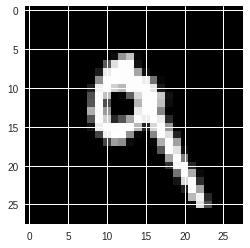

In [139]:
plt.imshow(encoded_img[7].reshape(8,4))
plt.imshow(xtest[7].reshape(28,28))
plt.gray()

# Convolutional Autoencoder


In [0]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, Dense, Activation
from keras.models import Model
from keras import backend as K

In [0]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x= Conv2D(8, (3, 3), activation='relu', padding= 'same')(encoded)
x= UpSampling2D((2, 2))(x)
x= Conv2D(8, (3, 3), activation='relu', padding= 'same')(x)
x= UpSampling2D((2, 2))(x)
x= Conv2D(16, (3, 3), activation='relu', padding= 'same')(x)
x= UpSampling2D((2, 2))(x)
decoded= Conv2D(1, (3, 3), activation='relu', padding= 'same')(x)

autoencoder= Model(input_img, decoded)

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [157]:
from keras.datasets import mnist
import numpy as np

(xtrain, _), (xtest, _) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.

print(xtrain.shape)
xtrain= np.reshape(xtrain, (len(xtrain), 28, 28, 1))
xtest= np.reshape(xtest, (len(xtest), 28, 28, 1))
print(xtrain.shape)


(60000, 28, 28)
(60000, 28, 28, 1)


In [158]:
autoencoder.fit(xtrain, xtrain, epochs=10, batch_size=128, shuffle=True, validation_data=(xtest, xtest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2150 - acc: 0.7966 - val_loss: 0.1673 - val_acc: 0.7963
Epoch 2/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1608 - acc: 0.7984 - val_loss: 0.1544 - val_acc: 0.8042
Epoch 3/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1474 - acc: 0.8018 - val_loss: 0.1399 - val_acc: 0.8005
Epoch 4/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1400 - acc: 0.8037 - val_loss: 0.1340 - val_acc: 0.8046
Epoch 5/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1367 - acc: 0.8046 - val_loss: 0.1307 - val_acc: 0.8027
Epoch 6/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1350 - acc: 0.8053 - val_loss: 0.1332 - val_acc: 0.8085
Epoch 7/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1329 - acc: 0.8059 - val_loss: 0.1290 - val_acc